In [356]:
# Importing Neccassary Library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [265]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [266]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [267]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [269]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [270]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [271]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [272]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [273]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [274]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [275]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [276]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [277]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [278]:
# Our independe variable 
train['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

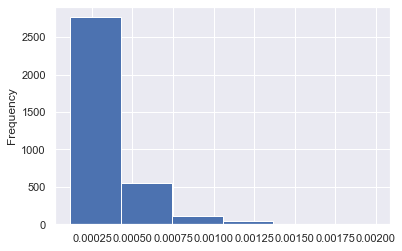

In [279]:
train['Item_Outlet_Sales'].value_counts(normalize=True).plot.hist(bins=6)

In [280]:
# Preprocessing :
fun_maps = {'Low Fat':1,'Regular':0,'LF':1,'reg':0,'low fat':1}

In [281]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(fun_maps)

In [282]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].map(fun_maps)

In [283]:
train['Item_Fat_Content'].value_counts()

1    5517
0    3006
Name: Item_Fat_Content, dtype: int64

In [284]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


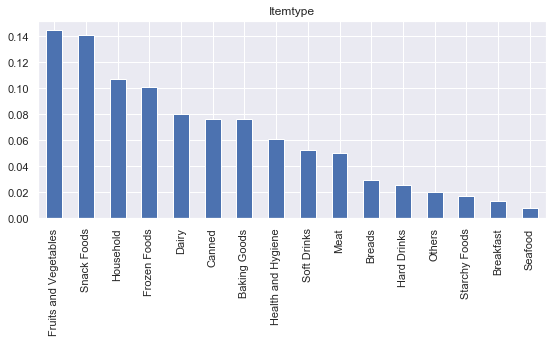

In [285]:
# Univariate analysis :
plt.figure(1)
plt.subplot(221)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = "Itemtype")

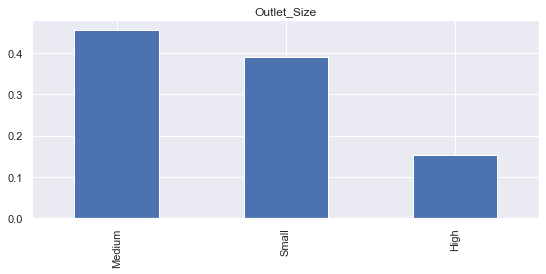

In [286]:
plt.figure(1)
plt.subplot(221)
train['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = "Outlet_Size")

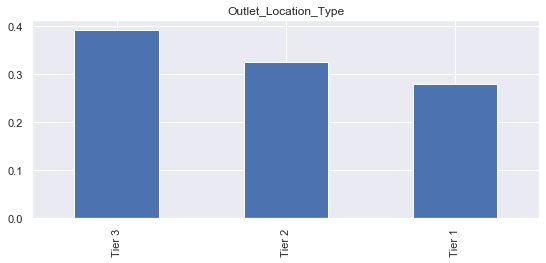

In [287]:
plt.figure(1)
plt.subplot(221)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = "Outlet_Location_Type")

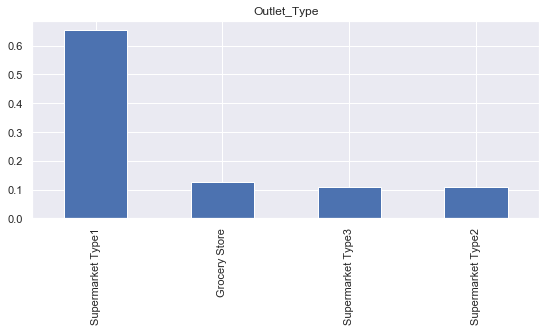

In [288]:
plt.figure(1)
plt.subplot(221)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = "Outlet_Type")

In [289]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

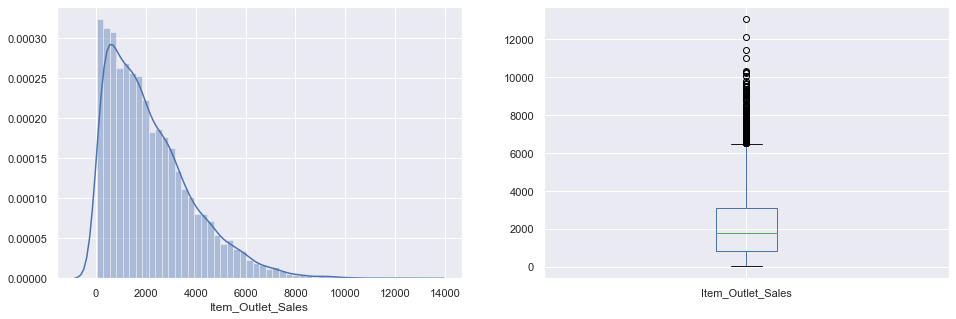

In [290]:
# Independent Variable (Numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales']);
plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))
plt.show()

In [291]:
# #since skewness of target variable is high, apply sqrt transform to reduce the skewness-
train['Item_Outlet_Sales'] = np.sqrt(train['Item_Outlet_Sales'])

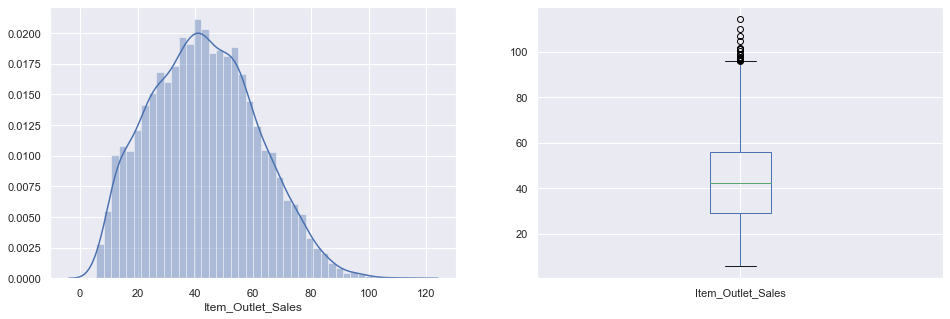

In [292]:
# Independent Variable (Numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales']);
plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))
plt.show()
# Now It was Normally Distributed ...And Outlier are Also Not Effected Much

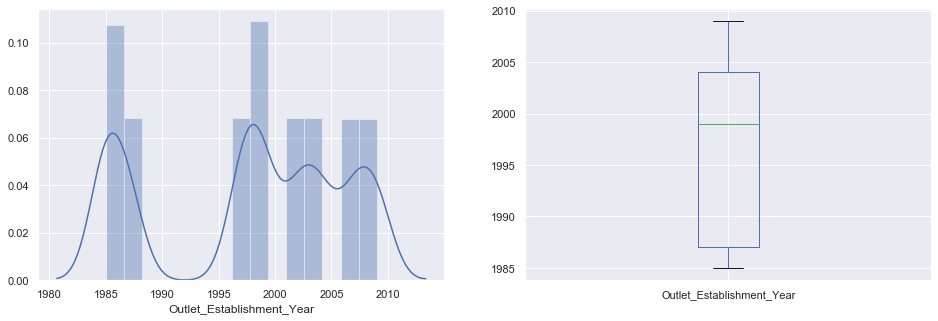

In [293]:
# Independent Variable (Numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Outlet_Establishment_Year']);
plt.subplot(122)
train['Outlet_Establishment_Year'].plot.box(figsize=(16,5))
plt.show()
# 

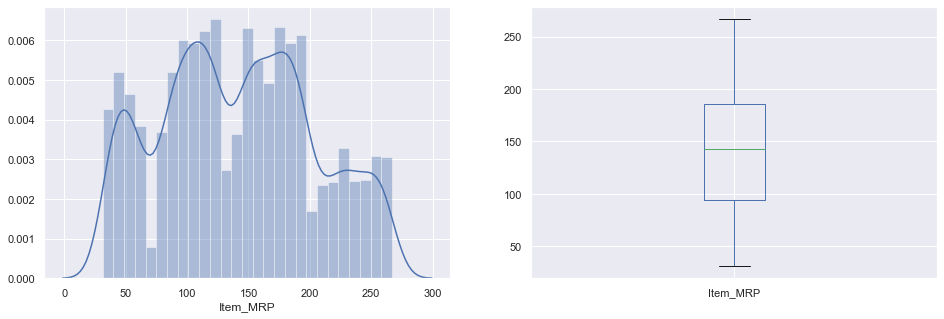

In [294]:
##Item_MRP
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_MRP']);
plt.subplot(122)
train['Item_MRP'].plot.box(figsize=(16,5))
plt.show()

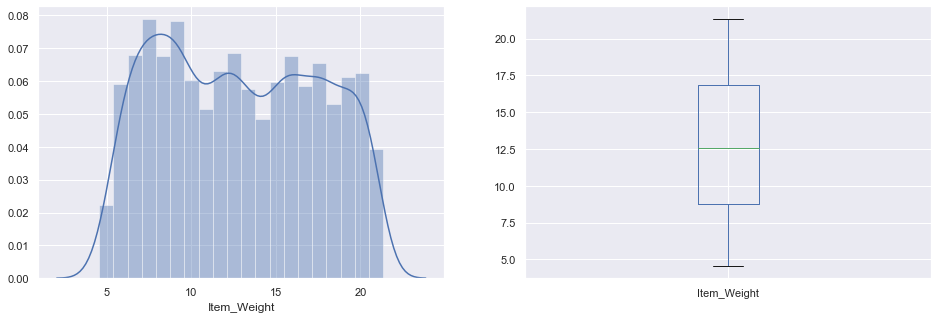

In [295]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Weight']);
plt.subplot(122)
train['Item_Weight'].plot.box(figsize=(16,5))
plt.show()

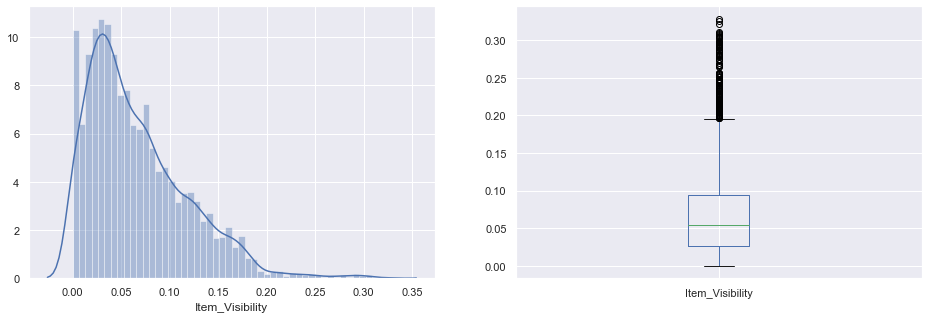

In [296]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Visibility']);
plt.subplot(122)
train['Item_Visibility'].plot.box(figsize=(16,5))
plt.show()

In [297]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


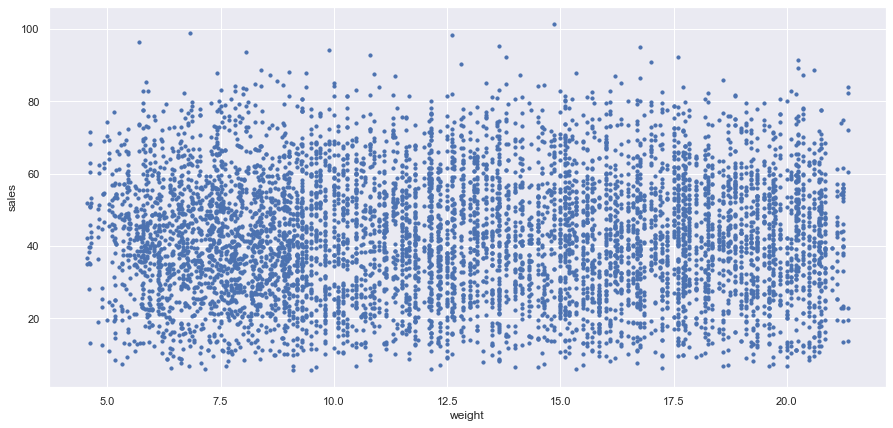

In [298]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Item_Weight'], y=train['Item_Outlet_Sales'], s=10)
plt.xlabel('weight')
plt.ylabel('sales')
plt.show()

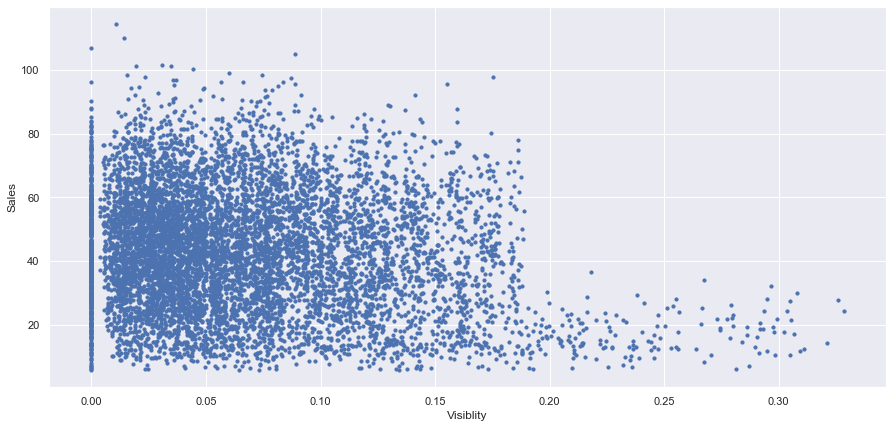

In [299]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Item_Visibility'], y=train['Item_Outlet_Sales'], s=10)
plt.xlabel('Visiblity')
plt.ylabel('Sales')
plt.show()

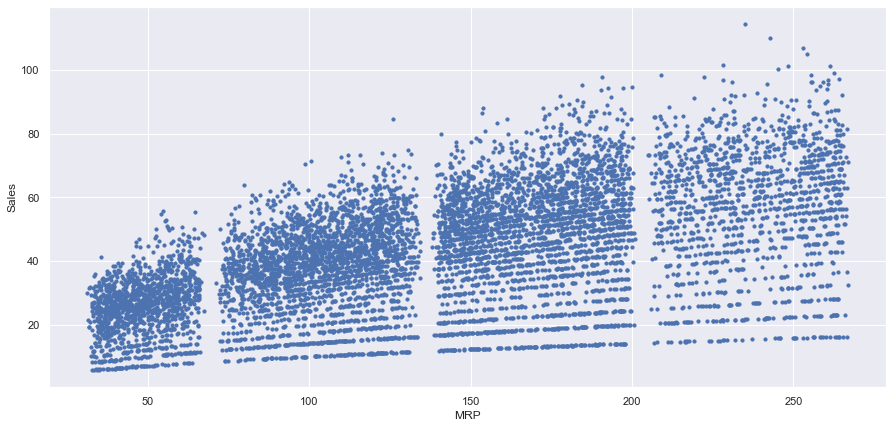

In [300]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Item_MRP'], y=train['Item_Outlet_Sales'], s=10)
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

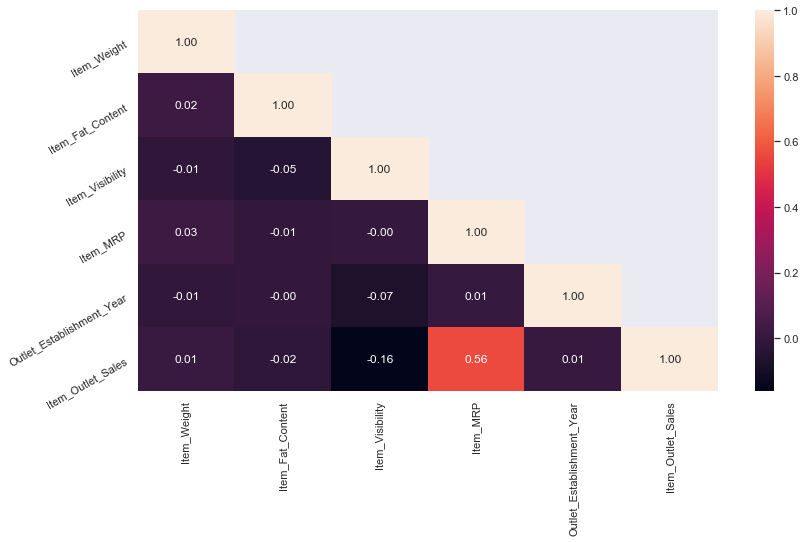

In [301]:
# feature Selection
#Correlation Matrix
corr = train.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [320]:
# 
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,27.062520
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947


In [303]:
# creating instance of labelencoder
item_type = LabelEncoder()
outlet_Identifier = LabelEncoder()
Outlet_Size = LabelEncoder()
Oultlet_Location_Type = LabelEncoder()
Outlet_Type = LabelEncoder()

In [304]:
x1 = train.copy()

In [305]:
x1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [306]:
x1['Item_Type'] = item_type.fit_transform(x1['Item_Type'])
test['Item_Type'] = item_type.fit_transform(test['Item_Type'])

In [307]:
x1['Outlet_Identifier'] = outlet_Identifier.fit_transform(x1['Outlet_Identifier'])
test['Outlet_Identifier'] = outlet_Identifier.fit_transform(test['Outlet_Identifier'])

In [308]:
map1 = {"High":1,"Medium":2,"Small":3}

In [309]:
x1['Outlet_Size'] = x1['Outlet_Size'].map(map1)
test['Outlet_Size'] = test['Outlet_Size'].map(map1)

In [315]:
x1['Outlet_Size'].isna().sum()
x1['Outlet_Size']=x1['Outlet_Size'].fillna(0)

test['Outlet_Size'] = test['Outlet_Size'].fillna(0)


In [311]:
x1['Outlet_Location_Type'] = Oultlet_Location_Type.fit_transform(x1['Outlet_Location_Type'])
test['Outlet_Location_Type'] = Oultlet_Location_Type.fit_transform(test['Outlet_Location_Type'])

In [312]:
x1['Outlet_Type'] = Outlet_Type.fit_transform(x1['Outlet_Type'])
test['Outlet_Type'] = Outlet_Type.fit_transform(test['Outlet_Type'])

In [316]:
test['Outlet_Size'].value_counts()

2.0    1862
0.0    1606
3.0    1592
1.0     621
Name: Outlet_Size, dtype: int64

In [331]:
x1['Outlet_Size'] = x1['Outlet_Size'].astype(int)
x1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,2,0,1,61.115775
1,DRC01,5.92,0,0.019278,14,48.2692,3,2009,2,2,2,21.057607
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,2,0,1,45.795961
3,FDX07,19.20,0,0.000000,6,182.0950,0,1998,0,2,0,27.062520
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,1,2,1,31.538947


In [325]:
x1.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,1,2,1,52.710373
8519,FDS36,8.380,0,0.046982,0,108.1570,7,2002,0,1,1,23.436830
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,3,1,1,34.541477
8521,FDN46,7.210,0,0.145221,13,103.1332,3,2009,2,2,2,42.960419
8522,DRG01,14.800,1,0.044878,14,75.4670,8,1997,3,0,1,27.670743


In [327]:
test['Item_Weight']=test['Item_Weight'].fillna(0)
x1['Item_Weight']=x1['Item_Weight'].fillna(0)

In [332]:
del x1['Item_Identifier']
del test['Item_Identifier']

In [334]:
x1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [339]:
# Collection X and y 
X = x1[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
y = x1['Item_Outlet_Sales']

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [346]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5966, 10), (2557, 10), (5966,), (2557,))

In [343]:
model = LinearRegression()

# fit the model with the training data
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.5692203959172558

In [348]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nItem_Outlet_Sales on training data',predict_train) 


Item_Outlet_Sales on training data [18.30770441 41.93721223 58.20585399 ... 64.43578296 40.93094644
 39.28651395]


In [349]:
# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  12.067195147523465


In [351]:
# predict the target on the testing dataset
predict_test = model.predict(X_test)
print('\nItem_Outlet_Sales on test data',predict_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


Item_Outlet_Sales on test data [29.21853749 25.79699311 32.20471918 ... 34.22094563 39.88079798
 59.55049898]

RMSE on test dataset :  11.787466651373562


In [355]:
#calculate R^2 for train data
r2_score(y_train, predict_train)
print("train accuracy",r2_score(y_train, predict_train))
# Calculate r2 for test data
r2_score(y_test,predict_test)
print("test accuracy",r2_score(y_test,predict_test))

train accuracy 0.5692203959172558
test accuracy 0.5842160169691073


In [357]:
# ### Random Forest Model :
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

## calculate R^2 for train data
r2_score(y_train, pred_train_RF)


#calculate R^2 for test data
r2_score(y_test, pred_test_RF)


Root Mean Squared Error For Training data = 4.113475069256069
Root Mean Squared Error For Test data = 10.830192543016084


0.6490064331347984

In [363]:
## ensemble Model 

from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.6966532953782686

In [367]:
#prediction on train data
pred_train = clf.predict(X_train)
#prediction on test data
pred_test = clf.predict(X_test)


##calculating RMSE for train data
RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
##calculating RMSE for test data
RMSE_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("Root Mean Squared Error For Training data = "+str(RMSE_train))
print("Root Mean Squared Error For Test data = "+str(RMSE_test))

#calculate R^2 for test data
r2_score(y_test, pred_test)
print(r2_score(y_test, pred_test))


Root Mean Squared Error For Training data = 10.12624452554734
Root Mean Squared Error For Test data = 10.345687326776542
0.6966532953782686
0.6797084370543518


In [369]:
## Gradient Boosting give great Accuracy :

Prediction = clf.predict(test)

In [370]:
test['Prediction'] = Prediction

In [371]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Prediction
0,20.750,1,0.007565,13,107.8622,9,1999,2.0,0,1,38.718509
1,8.300,0,0.038428,4,87.3198,2,2007,0.0,1,1,36.168432
2,14.600,1,0.099575,11,241.7538,0,1998,0.0,2,0,23.180656
3,7.315,1,0.015388,13,155.0340,2,2007,0.0,1,1,49.293330
4,0.000,0,0.118599,4,234.2300,5,1985,2.0,2,3,77.310296


In [373]:
test['Prediction'].head() #// Our Predicted Sales

0    38.718509
1    36.168432
2    23.180656
3    49.293330
4    77.310296
Name: Prediction, dtype: float64